# <font color=blue>The famous Iris flower data set or Fisher's Iris data set</font>
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris versicolor and Iris virginica). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
<br>
<br>
 *Petal and Sepal*
 <img title="petal&sepal" src="https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/logistic-regression/petal&sepal.jpeg?raw=1" width="400" /> <br> 




Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 
<br>
<br>
 *Iris setosa*
 <img title="Iris setosa" src="https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/logistic-regression/Iris_setosa.jpg?raw=1" width="400" /> <br> 
 *Iris versicolor*
 <img src="https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/logistic-regression/Iris_versicolor.jpg?raw=1" alt="Alt text that describes the graphic" title="Iris versicolor" width="400" /> <br> 
 *Iris virginica*
 <img src="https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/logistic-regression/Iris_virginica.jpg?raw=1" title="Iris virginica" width="400" />

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 367 (delta 96), reused 128 (delta 52), pack-reused 153
Receiving objects: 100% (367/367), 10.34 MiB | 14.98 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [ ]:
df = pd.read_csv('/content/PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/iris-data.csv')

In [ ]:
df.head(60)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [ ]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.838667,3.054667,3.758667,1.236552
std,0.804416,0.433123,1.764420,0.755058
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


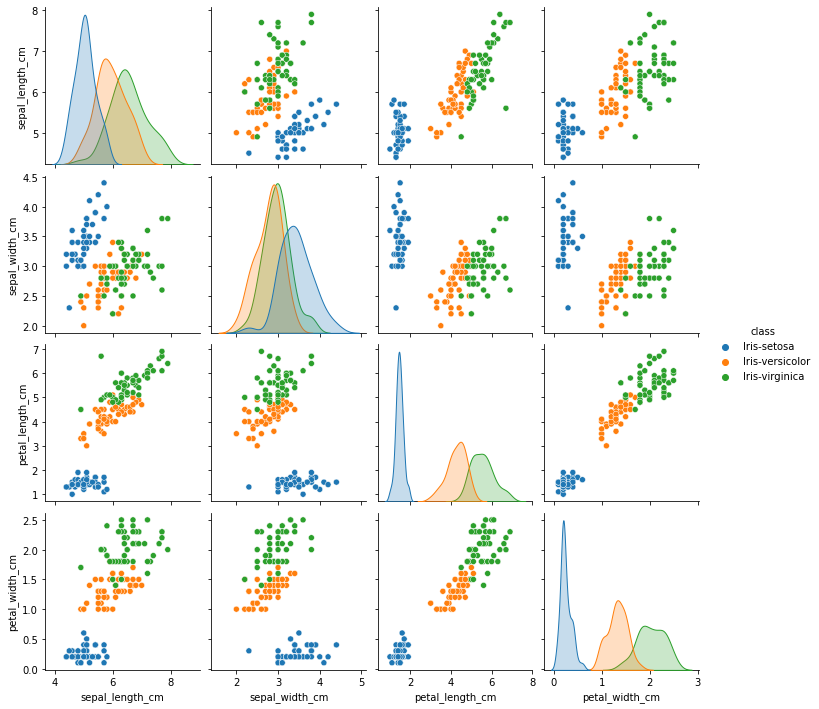

In [ ]:
sns.pairplot(df, hue='class', height=2.5)

In [ ]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

In [ ]:
df['class'].replace(["versicolor","Iris-setossa"],["Iris-versicolor","Iris-setosa"],inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

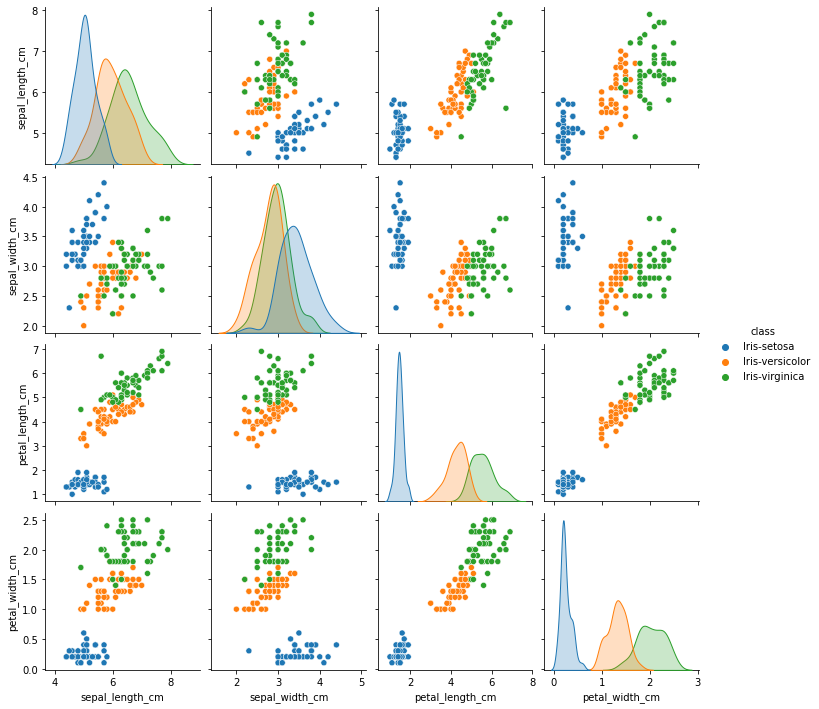

In [ ]:
sns.pairplot(df, hue='class', height=2.5)

# <font color=blue> Home-made Logistic Regression </font> 
Consider only two classes 'Iris-setosa' and 'Iris-virginica'. 

In [ ]:
final_df = df[df['class']!='Iris-versicolor']
final_df.head(150)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


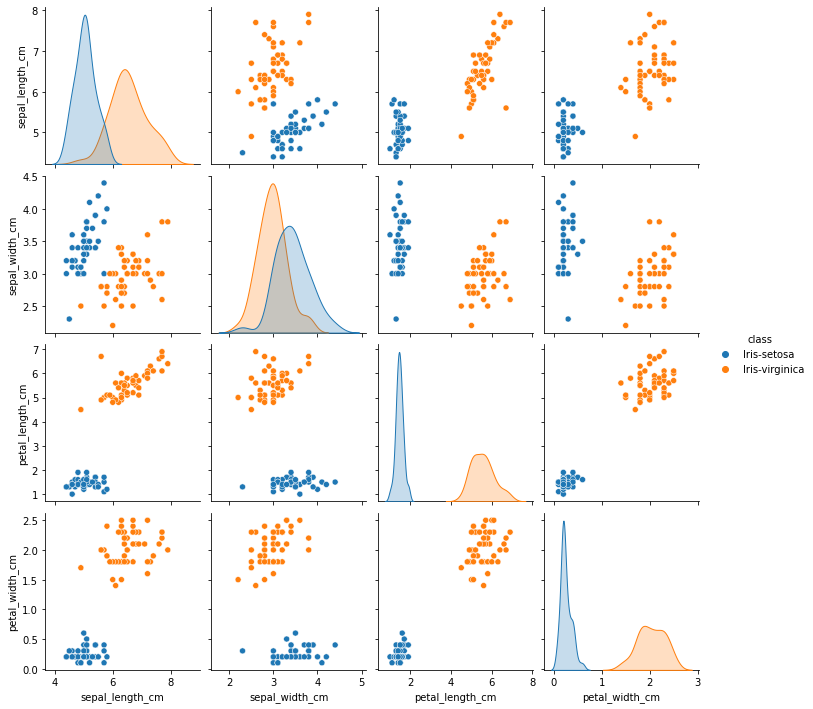

In [ ]:
sns.pairplot(final_df, hue='class', height=2.5)

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

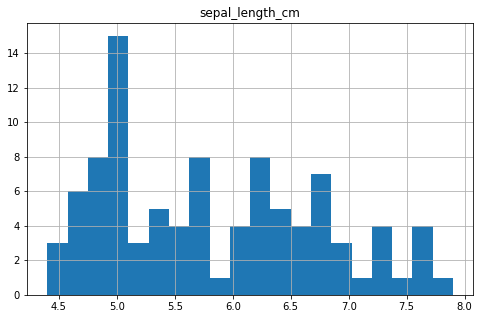

In [ ]:
final_df.hist(column = 'sepal_length_cm', bins=20, figsize=(8,5))

# <font color=blue> Label Encoding </font>

In [ ]:
final_df['class'].replace(["Iris-setosa","Iris-virginica"],[1,0],inplace=True)
final_df.head(150)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,2.3,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# <font color=blue> Model Construction </font>

In [ ]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.3, random_state=42)

In [ ]:
X_tr_arr = X_train
print('Training Input Shape', (X_tr_arr.shape))
X_ts_arr = X_test
print('Testing Input Shape', (X_ts_arr.shape))
y_tr_arr = y_train.values
print('Training Output Shape', (y_tr_arr.shape))
y_ts_arr = y_test.values
print('Testing Output Shape', (y_ts_arr.shape))

Training Input Shape (66, 4)
Testing Input Shape (29, 4)
Training Output Shape (66, 1)
Testing Output Shape (29, 1)


In [ ]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [ ]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    cost = -(1/m)*(np.sum((Y.T*np.log(final_result)) + (1-Y.T)*(np.log(1-final_result))))
    
    dw = (1/m)*(np.dot(X.T,(final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [ ]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        
        grads, cost = model_optimize(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * (dw.T)
        b = b - learning_rate * db
        
        if (i % 1000 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
            
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [ ]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [ ]:
# number of features
n_features = X_tr_arr.shape[1]
print('number of features', n_features)
w, b = weightInitialization(n_features)

number of features 4


In [ ]:
# Gradient descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.01, no_iterations=10000)
costs_tr = costs

Cost after 0 iteration is 0.693147
Cost after 1000 iteration is 0.044397
Cost after 2000 iteration is 0.023272
Cost after 3000 iteration is 0.015953
Cost after 4000 iteration is 0.012210
Cost after 5000 iteration is 0.009925
Cost after 6000 iteration is 0.008381
Cost after 7000 iteration is 0.007266
Cost after 8000 iteration is 0.006420
Cost after 9000 iteration is 0.005757


In [ ]:
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

Optimized weights [[-1.39859973  1.09403452 -2.05405581 -2.10006287]]
Optimized intercept -0.4203868122925552


In [ ]:
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

m_tr = X_tr_arr.shape[0]
m_ts = X_ts_arr.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
#y_tr_pred.reshape(1,66) 
#y_tr_arr.reshape(66,1)
print('Training data', sum(sum(y_tr_arr)))
print('Training prediction', sum(sum(y_tr_pred)))

Training data 28
Training prediction 28.0


In [ ]:
y_ts_pred = predict(final_test_pred, m_ts)
y_ts_pred.reshape(1,29) 
y_ts_arr.reshape(29,1)
print(y_ts_pred)
print(y_ts_arr.T)
print('Testing Accuracy', np.dot(y_ts_pred, y_ts_arr))

[[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
  1. 1. 1. 0. 1.]]
[[0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1]]
Testing Accuracy [[17.]]


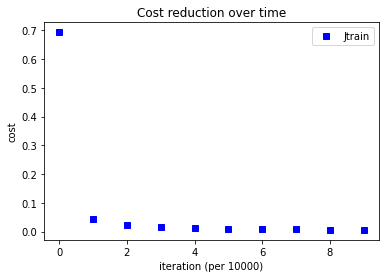

In [ ]:
plt.plot(costs_tr, 'bs', label='Jtrain')
plt.ylabel('cost')
plt.xlabel('iteration (per 10000)')
plt.title('Cost reduction over time')
plt.legend(loc='best')
plt.show()

# Learning curve

In [ ]:
# Gradient descent test
coeff, gradient, costs = model_predict(w, b, X_ts_arr, y_ts_arr, learning_rate=0.01, no_iterations=10000)
costs_ts = costs

Cost after 0 iteration is 0.005241
Cost after 1000 iteration is 0.004736
Cost after 2000 iteration is 0.004322
Cost after 3000 iteration is 0.003975
Cost after 4000 iteration is 0.003681
Cost after 5000 iteration is 0.003429
Cost after 6000 iteration is 0.003209
Cost after 7000 iteration is 0.003017
Cost after 8000 iteration is 0.002846
Cost after 9000 iteration is 0.002695


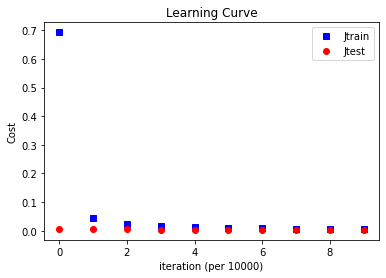

In [ ]:
plt.plot(costs_tr, 'bs', label='Jtrain')
plt.plot(costs_ts, 'ro', label='Jtest')
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.ylabel('Cost')
plt.xlabel('iteration (per 10000)')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()